In [1]:
# Installing Packages
!pip install yfinance pandas_datareader

  Preparing metadata (setup.py) ... done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=7129e5d92b350004ad05a556ba9707cbf114ce312a8086ed77afaa829b6c864c
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [2]:
# Importing Packages
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Creating list of different stocks
techlist=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [4]:
# Downloading Data
for stock in techlist:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Initializing lists with all names
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [6]:
# Appending company names
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [7]:
# Finding rolling average
ma_day = [10,20,30]
for ma in ma_day:
    for company in company_list:
        company['MA_'+str(ma)] = company['Close'].rolling(window=ma).mean()

In [48]:
# Scrapping GOOG Data
df = DataReader('GOOG',data_source='yahoo',start='2000-1-1',end='2022-03-03')

In [49]:
# Filtering only Close feature
data = df.filter(['Close'])

In [50]:
# Converting dataframe to numpy array
dataset = data.values

In [51]:
# Defining train dataset length
training_data_len = math.ceil(len(dataset) * .8)

In [52]:
# Min Max Scaler 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [53]:
# Splitting train data
training_data = scaled_data[0:training_data_len, :]

In [54]:
# X_train, Y_train Split
x_train = []
y_train = []
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([5.54543500e-05, 1.39473616e-03, 1.57790036e-03, 8.16678000e-04,
       1.00656343e-03, 1.32751998e-03, 1.03176902e-03, 3.36080925e-04,
       3.96575878e-04, 4.03299684e-05, 2.52061016e-04, 0.00000000e+00,
       2.63824138e-04, 3.84812756e-04, 3.86493386e-04, 8.93975390e-04,
       1.25862445e-03, 1.92910567e-03, 2.01480621e-03, 2.34584653e-03,
       2.93734845e-03, 3.25158504e-03, 2.99616277e-03, 3.08690520e-03,
       3.49692354e-03, 3.33056307e-03, 3.06674021e-03, 4.51188884e-03,
       5.22101940e-03, 4.97231964e-03, 5.47308041e-03, 5.88981999e-03,
       6.44603382e-03, 6.22926346e-03, 6.52669376e-03, 6.33848896e-03,
       5.92343001e-03, 6.28303589e-03, 6.87117655e-03, 7.05602267e-03,
       7.41058666e-03, 8.25919148e-03, 8.05418295e-03, 6.80228102e-03,
       8.29616019e-03, 1.21694946e-02, 1.46850603e-02, 1.37440337e-02,
       1.44447637e-02, 1.56765007e-02, 1.52295123e-02, 1.61352508e-02,
       1.59403235e-02, 1.54025940e-02, 1.42313520e-02, 1.16519301e-02,
     

In [55]:
# Converting them to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
# Reshaping X Train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [57]:
# Model Building
model = Sequential()
model.add(LSTM(128, return_sequences=True ,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(88, return_sequences=True))
model.add(LSTM(48, return_sequences=False))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [58]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 88)            76384     
_________________________________________________________________
lstm_8 (LSTM)                (None, 48)                26304     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               6272      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 16)               

In [59]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [60]:
# Compiling the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
109/109 [==============================] - 4s 12ms/step - loss: 8.9588e-04
Epoch 2/50
109/109 [==============================] - 1s 10ms/step - loss: 6.7378e-05
Epoch 3/50
109/109 [==============================] - 1s 10ms/step - loss: 7.4254e-05
Epoch 4/50
109/109 [==============================] - 1s 10ms/step - loss: 6.3543e-05
Epoch 5/50
109/109 [==============================] - 1s 10ms/step - loss: 6.6050e-05
Epoch 6/50
109/109 [==============================] - 1s 10ms/step - loss: 6.9601e-05
Epoch 7/50
109/109 [==============================] - 1s 10ms/step - loss: 6.1024e-05
Epoch 8/50
109/109 [==============================] - 1s 10ms/step - loss: 5.2290e-05
Epoch 9/50
109/109 [==============================] - 1s 10ms/step - loss: 6.6415e-05
Epoch 10/50
109/109 [==============================] - 1s 11ms/step - loss: 5.1151e-05
Epoch 11/50
109/109 [==============================] - 1s 11ms/step - loss: 5.0563e-05
Epoch 12/50
109/109 [==============================]

In [61]:
# Splitting Test Data
test_data = scaled_data[training_data_len:, :]
X_test = []
Y_test = []

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    Y_test.append(test_data[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

# Reshaping Test Data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [62]:
# Predictions using Test Data
preds = model.predict(X_test)

In [63]:
# Applying inverse trans
preds = scaler.inverse_transform(preds)

In [64]:
# Finding RMSE Value
rmse = np.sqrt(mean_squared_error(Y_test, preds))

In [65]:
# Train Val Seperation
train = data[:training_data_len]
valid = data[training_data_len+60:]

# Appending predictions made by model
valid['Predictions'] = preds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


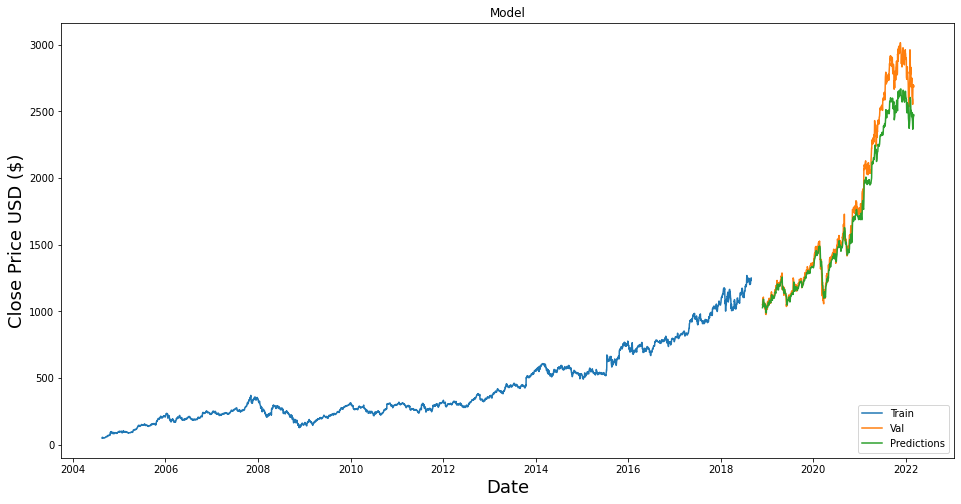

In [66]:
# Plot for comparing Validation Data & Test Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [67]:
# Checking Predictions for today
valid['Predictions']

Date
2018-11-26    1027.102417
2018-11-27    1033.162720
2018-11-28    1039.726318
2018-11-29    1057.264893
2018-11-30    1073.328003
                 ...     
2022-02-25    2397.273193
2022-02-28    2446.147217
2022-03-01    2476.477051
2022-03-02    2476.495605
2022-03-03    2467.186768
Name: Predictions, Length: 823, dtype: float32